# HABERMAN DATASET ANALYSIS

## OBJECTIVE:
**To explore the Haberman Cancer Survival Dataset and find which feature are helpful to determine the status of the person who is survive after 5 of the surgery and who died within 5 years**

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Data=pd.read_csv("haberman.csv")

### (Ques.) How many data points and what are the column names in the dataset ?

In [32]:
print(Data.shape)
print(Data.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


#### The data contains 306 cases and 3 features and 1 class label.

### (Ques.) How many data points for each class?

In [33]:
Data["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

#### Haberman dataset is a imbalanced dataset cause in each class the number of datapoints are not equal.

In [34]:
np.sum(Data.isna())

age       0
year      0
nodes     0
status    0
dtype: int64

#### There is no NA values in any column.

In [35]:
Data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [36]:
Data.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


# BIVARIATE ANALYSIS

## 2-D Scatter Plot

#### 'sns' corresponds to seaborn........
#### combination are exist -> 3c2=3.....

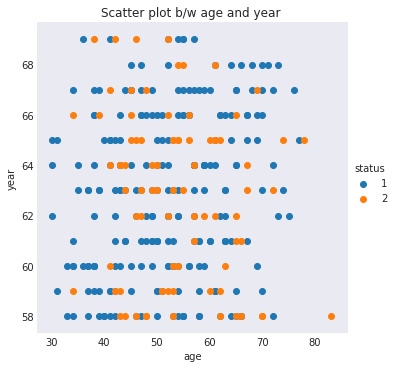

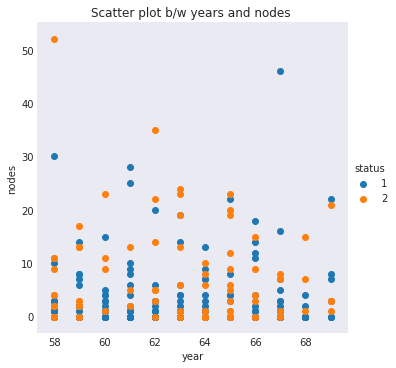

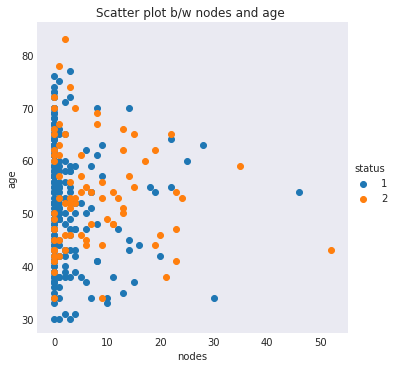

In [37]:
sns.set_style("dark");
sns.FacetGrid(Data,hue="status",size=5).map(plt.scatter,"age","year")\
                 .add_legend();
plt.title('Scatter plot b/w age and year ')
sns.FacetGrid(Data,hue="status",size=5).map(plt.scatter,"year","nodes")\
                 .add_legend();
plt.title('Scatter plot b/w years and nodes ')
sns.FacetGrid(Data,hue="status",size=5).map(plt.scatter,"nodes","age")\
                 .add_legend();
plt.title('Scatter plot b/w nodes and age ')
plt.show();

### OBSERVATIONS:-
1. In first scattered plot,using year and age ,we cannot distinguish that pateint is survived 5 years or longer or the patient died within 5 year.
2. Similary second and third scatter plot ,data is not linearly separated.
3. All the features are overlap with each other in all the cases. 

## Pair-plot

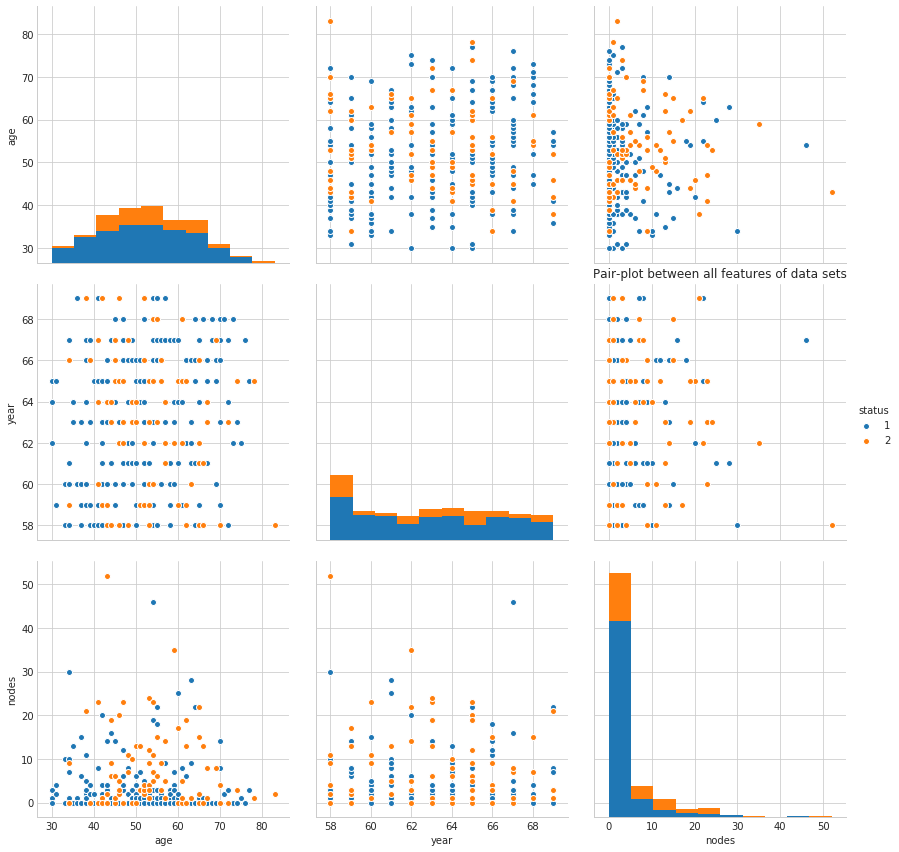

In [38]:
# pairplot is pairwaise plotting
#Pairplot is only possible to view 2D pattern,we cannot visulized the pattern in 3 dimentional and 4 dimentional..
#diag_kind>>> kind of plot for diagonal subplot..
sns.set_style("whitegrid");
sns.pairplot(Data,vars=['age', 'year', 'nodes'],kind='scatter',hue="status",diag_kind='hist',size=4);
plt.title("Pair-plot between all features of data sets")
plt.show()
#Data.head()

## OBSERVATIONS:-
1. Patient age and the number of axillary nodes have some useful characteristics for classification.
2. Patient year of operation doesn't effect on the classification.
3. We cannot differentiate between the features using if-else conditions.


## UNIVARIATE ANALYSIS


## Histogram , PDF ,CDF

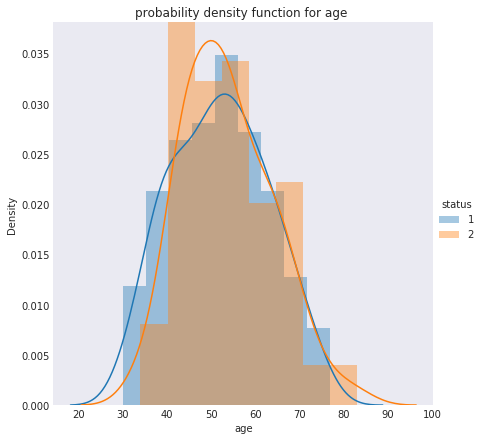

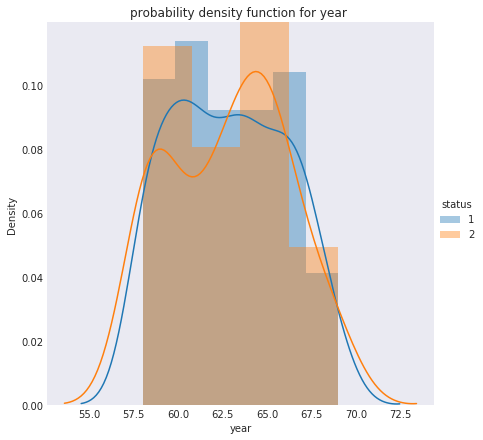

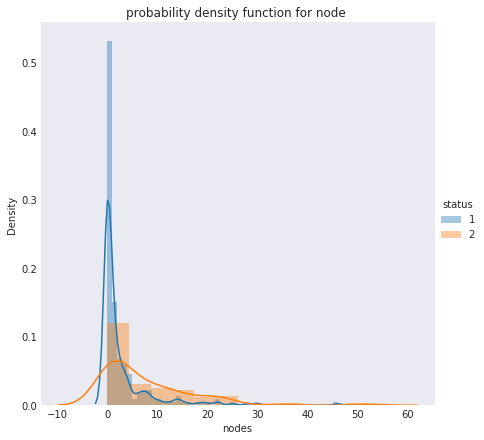

In [39]:
sns.set_style("dark");
sns.FacetGrid(Data, hue="status", size=6).map(sns.distplot, "age").add_legend()
plt.ylabel('Density')
plt.title('probability density function for age ')
plt.show()
sns.FacetGrid(Data, hue="status", size=6).map(sns.distplot, "year").add_legend()
plt.ylabel('Density')
plt.title('probability density function for year ')
plt.show()
sns.FacetGrid(Data, hue="status", size=6).map(sns.distplot, "nodes").add_legend()
plt.ylabel('Density')
plt.title('probability density function for node ')
plt.show()



## OBSERVATIONS:-
1. The PDF are not well separated .
2. while the age and year features are massively overlapped with each other,but the nodes are shows some effects.
3. If patient's age between 40-60 ,there is a high chance of Patients Survival for more than 5 years
4. In the axillary node ,we can say  that above 0.2 probability who can survive more than 5 years. 

## CDF
**feature nodes is more favorable for classification**

In [40]:
Data_Survived=Data.loc[Data["status"]==1]
print(Data_Survived.head())
print(Data_Survived.shape)

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
(225, 4)


In [41]:
Data_Dead=Data.loc[Data["status"]==2]
print(Data_Dead.head())
print(Data_Dead.shape)

    age  year  nodes  status
7    34    59      0       2
8    34    66      9       2
24   38    69     21       2
34   39    66      0       2
43   41    60     23       2
(81, 4)


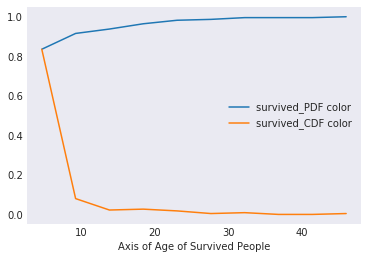

In [42]:
counts, bin_edges = np.histogram(Data_Survived['nodes'], bins=10, density=True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges[1:], pdf)
plt.legend("status")
plt.legend(["survived_PDF color","survived_CDF color"])
plt.xlabel("Axis of Age of Survived People")
plt.show()

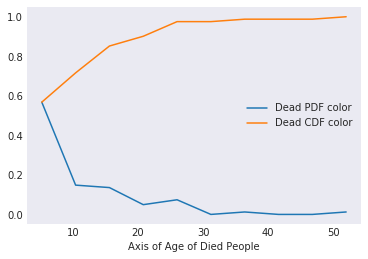

In [43]:
counts,bin_edges=np.histogram(Data_Dead["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend("status")
plt.legend(["Dead PDF color","Dead CDF color"])
plt.xlabel("Axis of Age of Died People")
plt.show()

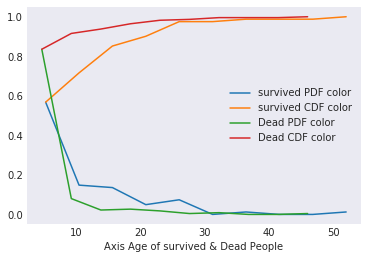

In [44]:
counts,bin_edges=np.histogram(Data_Dead["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(Data_Survived["nodes"],bins=10,density=True)
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend("status")
plt.legend(["survived PDF color","survived CDF color","Dead PDF color","Dead CDF color"])
plt.xlabel("Axis Age of survived & Dead People")
plt.show()

## OBSERVATIONS:-
1. Patient survived most who has less than 0.3 nodes

## Box plot and Whiskers


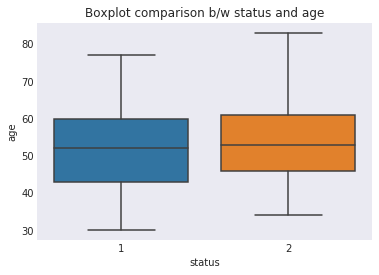

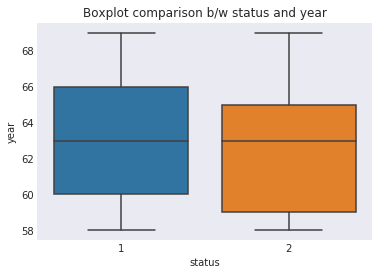

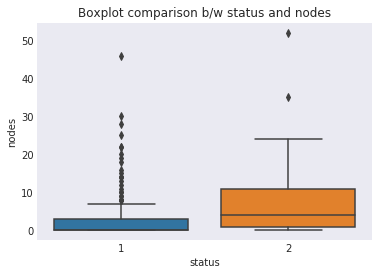

In [45]:
sns.boxplot(x='status',y='age', data=Data)
plt.title('Boxplot comparison b/w status and age')
plt.show()
sns.boxplot(x='status',y='year', data=Data)
plt.title('Boxplot comparison b/w status and year')
plt.show()
sns.boxplot(x='status',y='nodes', data=Data)
plt.title('Boxplot comparison b/w status and nodes')
plt.show()


## Violin plots


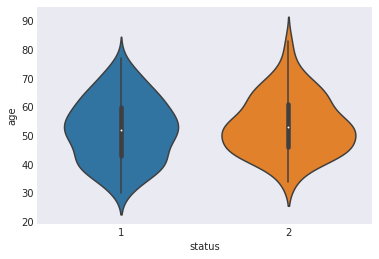

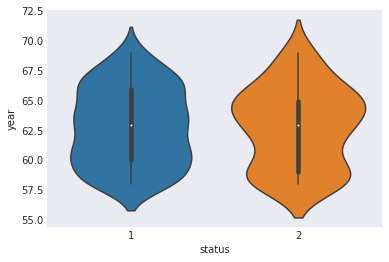

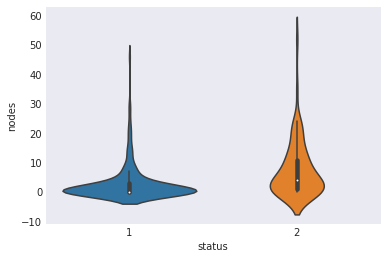

In [46]:
sns.violinplot(x="status", y="age", data=Data, size=10)
plt.show()
sns.violinplot(x="status", y="year", data=Data, size=10)
plt.show()
sns.violinplot(x="status", y="nodes", data=Data, size=10)
plt.show()


## OBSERVATION:-

1. The patient who treated before 1958 have slightly low chance to survive, and the patient who treated after 1965 have slightly high chance to survive that the rest.
2. The positive axillary nodes of survivors is highly densed from 0-5 and less dense in other cases.

## CONCLUSION

1.  The Haberman's dataset is highly overlapped.
2.  Data is not linearly separable and also their is no    correlation between features.
3. Dataset is imbalanced ,so its hard to identify.
4.  The feature axillary node is turned out to be important role beacuse rest all the features(age and years) are highly overlapped.